In [42]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("/kaggle/input/ddgrtet/date-hour-soo-dest-2022.csv")

In [4]:
data

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2022-01-01,0,12TH,12TH,1
1,2022-01-01,0,12TH,16TH,1
2,2022-01-01,0,12TH,24TH,2
3,2022-01-01,0,12TH,ASHB,1
4,2022-01-01,0,12TH,MONT,1
...,...,...,...,...,...
8245365,2022-12-31,23,WOAK,MCAR,1
8245366,2022-12-31,23,WOAK,MLBR,1
8245367,2022-12-31,23,WOAK,MONT,2
8245368,2022-12-31,23,WOAK,POWL,9


In [5]:
data.shape

(8245370, 5)

In [6]:
data.head(30)

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2022-01-01,0,12TH,12TH,1
1,2022-01-01,0,12TH,16TH,1
2,2022-01-01,0,12TH,24TH,2
3,2022-01-01,0,12TH,ASHB,1
4,2022-01-01,0,12TH,MONT,1
5,2022-01-01,0,12TH,POWL,2
6,2022-01-01,0,16TH,12TH,3
7,2022-01-01,0,16TH,16TH,8
8,2022-01-01,0,16TH,24TH,2
9,2022-01-01,0,16TH,DALY,3


In [7]:
data.tail()

,Date,Hour,Origin Station,Destination Station,Trip Count
8245365,2022-12-31,23,WOAK,MCAR,1
8245366,2022-12-31,23,WOAK,MLBR,1
8245367,2022-12-31,23,WOAK,MONT,2
8245368,2022-12-31,23,WOAK,POWL,9
8245369,2022-12-31,23,WOAK,SBRN,1


In [8]:
data.columns

Index(['Date', 'Hour', 'Origin Station', 'Destination Station', 'Trip Count'], dtype='object')

In [9]:
data.dtypes

Date                   object
Hour                    int64
Origin Station         object
Destination Station    object
Trip Count              int64
dtype: object

In [10]:
data.describe()

,Hour,Trip Count
count,8.245370e+06,8.245370e+06
mean,1.365159e+01,5.092160e+00
std,5.278143e+00,9.389647e+00
min,0.000000e+00,1.000000e+00
25%,9.000000e+00,1.000000e+00
50%,1.400000e+01,2.000000e+00
75%,1.800000e+01,5.000000e+00
max,2.300000e+01,4.930000e+02


In [11]:
data.isna()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
8245365,False,False,False,False,False
8245366,False,False,False,False,False
8245367,False,False,False,False,False
8245368,False,False,False,False,False


In [12]:
data.isna().sum()

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.duplicated().sum()


0

In [15]:
#data.columns = data.columns.str.strip().str.replace(' ', '').str.lower()

In [16]:
numeric_columns = ['Hour', 'Trip Count']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [17]:
categorical_columns = ['Origin Station', 'Destination Station']
for col in categorical_columns:
    data[col] = data[col].str.strip().str.lower()

In [45]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [46]:
print("ข้อมูลหลังทำความสะอาด:")
print(data.info())
print(data.head())

ข้อมูลหลังทำความสะอาด:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245370 entries, 0 to 8245369
Data columns (total 6 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Date                 datetime64[ns]
 1   Hour                 int64         
 2   Origin Station       object        
 3   Destination Station  object        
 4   Trip Count           int64         
 5   Time Period          object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 377.4+ MB
None
        Date  Hour Origin Station Destination Station  Trip Count Time Period
0 2022-01-01     0           12th                12th           1        None
1 2022-01-01     0           12th                16th           1        None
2 2022-01-01     0           12th                24th           2        None
3 2022-01-01     0           12th                ashb           1        None
4 2022-01-01     0           12th                mont           1      

In [20]:
 data.to_csv("data_cleaned 2022.csv", index=False)

In [21]:
data = pd.read_csv("/kaggle/working/data_cleaned 2022.csv")

In [22]:
data

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2022-01-01,0,12th,12th,1
1,2022-01-01,0,12th,16th,1
2,2022-01-01,0,12th,24th,2
3,2022-01-01,0,12th,ashb,1
4,2022-01-01,0,12th,mont,1
...,...,...,...,...,...
8245365,2022-12-31,23,woak,mcar,1
8245366,2022-12-31,23,woak,mlbr,1
8245367,2022-12-31,23,woak,mont,2
8245368,2022-12-31,23,woak,powl,9


In [23]:

total_trips = data["Trip Count"].sum()
print("จำนวน Trip Count ของ ปี 2022 (หลังโควิด)")
print(total_trips,"Trip")

จำนวน Trip Count ของ ปี 2022 (หลังโควิด)
41986747 Trip


In [24]:
#สภานีต้นทางที่มีคนใช้บริการมากที่สุด ปี 2022
origin_count = data.groupby("Origin Station")['Trip Count'].sum().reset_index().sort_values("Trip Count", ascending=False)


In [25]:
origin_count

,Origin Station,Trip Count
37,powl,3565974
18,embr,3424953
28,mont,2696536
10,civc,2446851
1,16th,1510381
3,24th,1458509
15,dbrk,1401018
42,sfia,1225087
0,12th,1165715
6,balb,1119901


In [26]:
#สภานีปลายทางที่มีคนไปมากที่สุด ปี 2022
Destination_count = data.groupby('Destination Station')['Trip Count'].sum().reset_index().sort_values("Trip Count", ascending=False)


In [27]:
Destination_count

,Destination Station,Trip Count
18,embr,3906752
28,mont,3194199
37,powl,3133336
10,civc,2292657
1,16th,1526886
3,24th,1464710
15,dbrk,1421400
0,12th,1147755
14,daly,1102841
2,19th,1085976


In [28]:
#ต้นทาง คนขึ้นมากสุด Top5
print("Top 5 Origin")
print(origin_count.head())

Top 5 Origin
   Origin Station  Trip Count
37           powl     3565974
18           embr     3424953
28           mont     2696536
10           civc     2446851
1            16th     1510381


In [29]:
#ปลายทาง คนลงมากสุด Top5
print("Top 5 Destination")
print(Destination_count.head())

Top 5 Destination
   Destination Station  Trip Count
18                embr     3906752
28                mont     3194199
37                powl     3133336
10                civc     2292657
1                 16th     1526886


In [30]:
#หาคนใช้เส้นทางที่มีการเดินทางมากที่สุด
a = data.groupby(["Origin Station","Destination Station"])["Trip Count"].sum().reset_index()
a

,Origin Station,Destination Station,Trip Count
0,12th,12th,13836
1,12th,16th,40620
2,12th,19th,5683
3,12th,24th,30156
4,12th,antc,18642
...,...,...,...
2495,woak,ucty,2981
2496,woak,warm,2187
2497,woak,wcrk,3344
2498,woak,wdub,1736


In [31]:
#เส้นทางที่มีการเดินทางมากที่สุด top 10
top_a = a.sort_values("Trip Count", ascending = False)
print("เส้นทางที่มีการเดินทางมากที่สุด Top 10 ปี 2022")
print(top_a.head(10))



เส้นทางที่มีการเดินทางมากที่สุด Top 10 ปี 2022
     Origin Station Destination Station  Trip Count
1856           powl                balb      250113
1853           powl                24th      229937
2468           woak                embr      208516
2137           sfia                powl      207172
337            balb                powl      206910
187            24th                powl      195643
1864           powl                daly      190777
328            balb                mont      186889
949            embr                woak      179769
1892           powl                sfia      175283


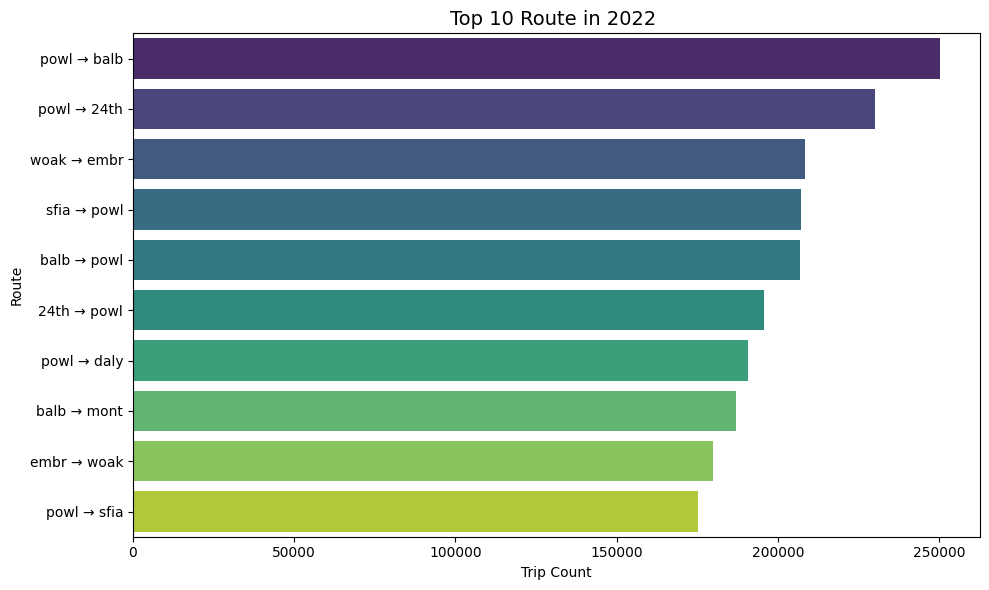

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

top_a = a.sort_values("Trip Count", ascending=False).head(10)
top_a["Route"] = top_a["Origin Station"] + " → " + top_a["Destination Station"]


plt.figure(figsize=(10,6))

sns.barplot(x="Trip Count", y="Route", data=top_a, palette="viridis")
plt.title("Top 10 Route in 2022 ", fontsize=14)
plt.xlabel("Trip Count")
plt.ylabel("Route")
plt.tight_layout()
plt.show()

In [33]:
#ช่วงเวลาคนใช้บริการเยอะสุด
def time_day(hour):
    if 5 <= hour <= 11:
        return "Morning"
    if 12 <= hour <= 15:
        return "Afternoon"
    if 16 <= hour <= 19:
        return "Evening"
    if 20 <= hour <= 24:
        return "Night"

data["Time Period"] = data["Hour"].apply(time_day)
time_counts= data.groupby(["Date","Time Period"])["Trip Count"].sum().reset_index()
max_time_per_day = time_counts.loc[time_counts.groupby("Date")["Trip Count"].idxmax()]

In [34]:
#จำนวนคนใช้บริการในแต่ละช่วง ของวัน/เดือน/ปี นั้นๆ
time_counts.head(20)

,Date,Time Period,Trip Count
0,2022-01-01,Afternoon,11056
1,2022-01-01,Evening,10067
2,2022-01-01,Morning,8056
3,2022-01-01,Night,3996
4,2022-01-02,Afternoon,11431
5,2022-01-02,Evening,11217
6,2022-01-02,Morning,8543
7,2022-01-02,Night,3093
8,2022-01-03,Afternoon,16928
9,2022-01-03,Evening,24662


In [35]:
time_counts.groupby("Time Period")["Trip Count"].agg(["sum"]).sort_values("sum", ascending=False)



,sum
Time Period,
Morning,15220087
Evening,13935044
Afternoon,8555760
Night,3847007


In [36]:
total_trips = data["Trip Count"].sum()
print("จำนวน Trip Count ของ ปี 2022")
print(total_trips)

จำนวน Trip Count ของ ปี 2022
41986747


In [37]:
print("จำนวนผู้โดยสารสูงสุดของแต่ละวัน/เดือน/ปี ตามช่วงเวลา")
print(max_time_per_day.head(10))

จำนวนผู้โดยสารสูงสุดของแต่ละวัน/เดือน/ปี ตามช่วงเวลา
          Date Time Period  Trip Count
0   2022-01-01   Afternoon       11056
4   2022-01-02   Afternoon       11431
10  2022-01-03     Morning       29983
14  2022-01-04     Morning       32865
18  2022-01-05     Morning       33917
22  2022-01-06     Morning       33479
26  2022-01-07     Morning       29973
29  2022-01-08     Evening       15129
32  2022-01-09   Afternoon       11680
38  2022-01-10     Morning       32205


In [38]:
print(max_time_per_day.max())

Date           2022-12-31
Time Period       Morning
Trip Count          78856
dtype: object


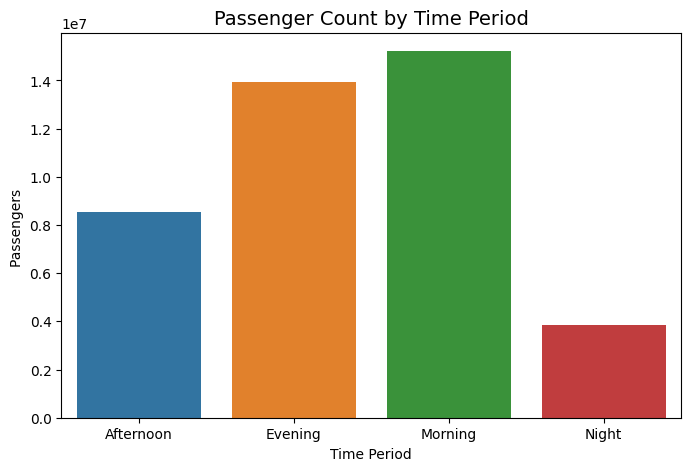

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot

time_sum = time_counts.groupby("Time Period")["Trip Count"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Time Period", y="Trip Count", data=time_sum)
plt.title("Passenger Count by Time Period" ,fontsize=14)
plt.ylabel("Passengers ")
plt.show()

In [51]:
data['Day_type'] = data['Date'].dt.dayofweek.apply(lambda x: 'weekend' if x >= 5 else 'weekday')

In [53]:
daily_counts = data.groupby(['Date','Day_type'])['Trip Count'].sum().reset_index()

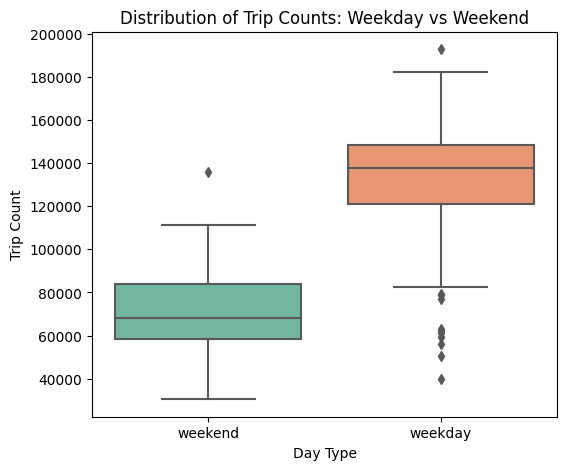

In [58]:
weekday_data = daily_counts[daily_counts['Day_type']=='weekday']['Trip Count'] # weekday = วันราชการ จัน-ศุกร์
weekend_data = daily_counts[daily_counts['Day_type']=='weekend']['Trip Count'] # weekend = วันหยุด

plt.figure(figsize=(6,5))
sns.boxplot(x="Day_type", y="Trip Count", data=daily_counts, palette="Set2")
plt.title("Distribution of Trip Counts: Weekday vs Weekend")
plt.ylabel("Trip Count")
plt.xlabel("Day Type")
plt.show()

/tmp/ipykernel_36/2402021743.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Day_type", y="Trip Count", data=daily_counts, palette="Set1", ci="sd")


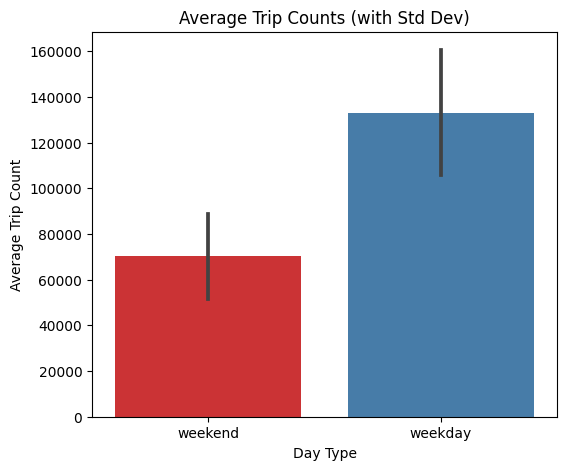

In [59]:
plt.figure(figsize=(6,5))
sns.barplot(x="Day_type", y="Trip Count", data=daily_counts, palette="Set1", ci="sd")
plt.title("Average Trip Counts (with Std Dev)")
plt.ylabel("Average Trip Count")
plt.xlabel("Day Type")
plt.show()

In [61]:
#ทำ One-way ANOVA
from scipy import stats
f_stat, p_value = stats.f_oneway(weekday_data, weekend_data)

print("ANOVA Test Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ มีความแตกต่างอย่างมีนัยสำคัญระหว่างวันธรรมดาและวันหยุด")
else:
    print("❌ ไม่พบความแตกต่างอย่างมีนัยสำคัญระหว่างวันธรรมดาและวันหยุด")

ANOVA Test Results:
F-statistic: 467.82094491312057
p-value: 3.005632153157976e-67
✅ มีความแตกต่างอย่างมีนัยสำคัญระหว่างวันธรรมดาและวันหยุด


In [65]:
monthly_counts = daily_counts.groupby([pd.Grouper(key='Date', freq='MS'), 'Day_type'])['Trip Count'].mean().reset_index()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

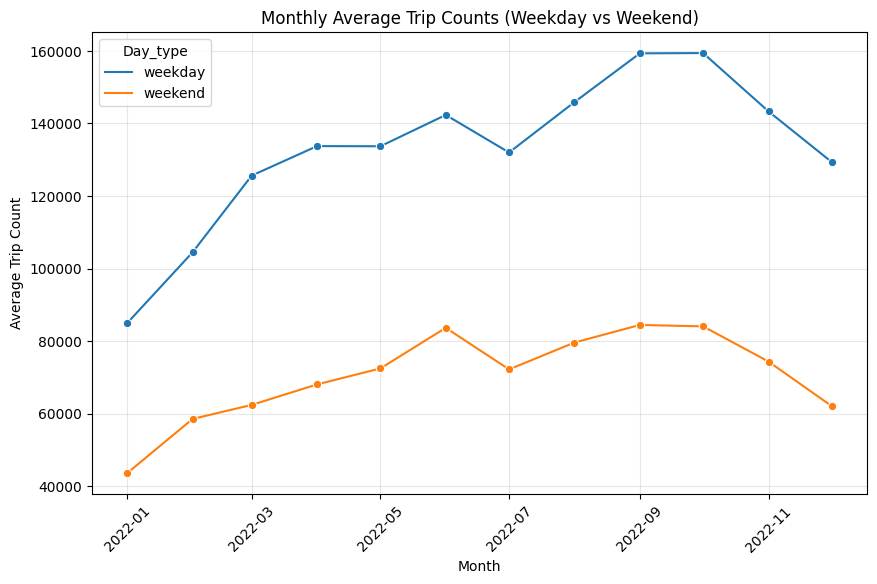

In [67]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_counts, x="Date", y="Trip Count", hue="Day_type", marker="o")
plt.title("Monthly Average Trip Counts (Weekday vs Weekend)")
plt.ylabel("Average Trip Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
#data.query('`Origin Station` == "12TH"')


In [ ]:
#ax = data['Trip Count'].plot(kind='line')


In [ ]:
#import seaborn as sns


In [ ]:
#sns.scatterplot(x = 'Hour',
                y = 'Trip Count',
                hue = 'Origin Station',
                data = data)
plt.show()

In [ ]:
#g = sns.FacetGrid(data, col="Origin Station",col_wrap=4, height=4)
